# SVM Analysis: Students Social Media Addiction
#### Raymond Feivel Liander - 5025231214

## Objective
Untuk memprediksi "Addicted Score" siswa terhadap media sosial berdasarkan perilaku karakteristik mereka menggunakan algoritma SVM.

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor # Digunakan untuk feature importance
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler # Untuk normalisasi/standardisasi
from sklearn.decomposition import PCA # Untuk visualisasi PCA
import warnings

## Load and Explore Dataset

In [5]:
# Set plot style untuk visualisasi yang lebih baik
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("--- Memuat dan Mengeksplorasi Dataset ---")
print("=" * 50)

# Load the preprocessed dataset
df = pd.read_csv('../dataset/students_social_media_preprocessed.csv')

print(f"\n5 Baris Pertama Dataset:")
print(df.head())
print("\nStatistik Dasar Dataset:")
print(df.describe().T)
print("\nPengecekan Nilai Hilang:")
print(df.isnull().sum().sum(), "nilai hilang ditemukan")

# Mendefinisikan variabel target
target = 'Addicted_Score'
X = df.drop(columns=[target]) # Fitur (semua kolom kecuali target)
y = df[target] # Variabel target

--- Memuat dan Mengeksplorasi Dataset ---

5 Baris Pertama Dataset:
        Age  Avg_Daily_Usage_Hours  Sleep_Hours_Per_Night  \
0 -1.186915               0.223857              -0.327638   
1  0.958662              -2.243309               0.560423   
2 -0.471723               0.860545              -1.659730   
3 -1.902108              -1.527035               0.116393   
4  0.243470              -0.333245              -0.771668   

   Mental_Health_Score  Conflicts_Over_Social_Media  Addicted_Score  \
0            -0.205520                     0.157063        0.985550   
1             1.605628                    -2.976790       -2.166958   
2            -1.111095                     1.201681        1.616052   
3             0.700054                    -1.932172       -1.536456   
4            -0.205520                    -0.887554        0.355048   

   Gender_Encoded  Affects_Academic_Performance_Encoded  \
0               0                                     1   
1               1   

In [6]:
# Dataset information
print("DATASET INFORMATION")
print("="*50)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nColumn Information:")
df.info()

print("\nColumn Names:")
print(df.columns.tolist())


DATASET INFORMATION
Number of rows: 705
Number of columns: 64

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 64 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   705 non-null    float64
 1   Avg_Daily_Usage_Hours                 705 non-null    float64
 2   Sleep_Hours_Per_Night                 705 non-null    float64
 3   Mental_Health_Score                   705 non-null    float64
 4   Conflicts_Over_Social_Media           705 non-null    float64
 5   Addicted_Score                        705 non-null    float64
 6   Gender_Encoded                        705 non-null    int64  
 7   Affects_Academic_Performance_Encoded  705 non-null    int64  
 8   Academic_Level_Graduate               705 non-null    int64  
 9   Academic_Level_High School            705 non-null    int64  
 10  Aca

## Uji Coba Tanpa dan Dengan Seleksi Fitur



--- SKENARIO UJI COBA: PENGARUH SELEKSI FITUR ---
Data dibagi: X_train_fs (564, 63), X_test_fs (141, 63)

Menggunakan parameter SVR dasar untuk perbandingan seleksi fitur: Kernel='rbf', C=1.0, Epsilon=0.1

--- Skenario 4.1: Melatih SVR dengan SEMUA fitur yang sudah diskalakan ---
  Performa Model SVR (Semua Fitur):
    Mean Squared Error (MSE): 0.0391
    R² Score: 0.9607
    Mean Absolute Error (MAE): 0.1098

--- Skenario 4.2: Melatih SVR dengan SELEKSI FITUR (menggunakan Random Forest Importance) ---
  Fitur yang dipilih (15 teratas berdasarkan Random Forest Importance):
['Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Country_USA', 'Lifestyle_Balance', 'Platform_LINE', 'Affects_Academic_Performance_Encoded', 'Country_Maldives', 'Platform_KakaoTalk', 'SM_Impact_Score', 'Country_South Korea', 'Country_India', 'Sleep_Hours_Per_Night', 'Country_Frequency', 'Platform_WhatsApp', 'Avg_Daily_Usage_Hours']


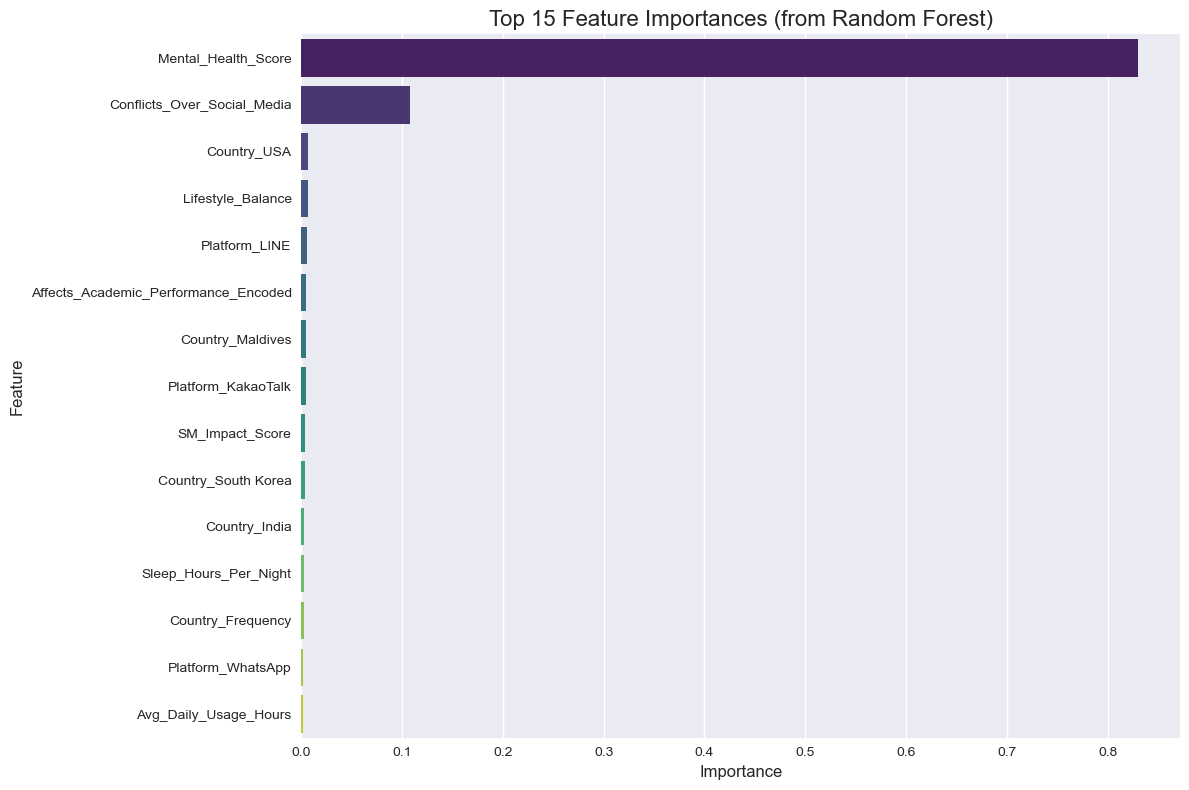

  Performa Model SVR (Fitur Terpilih):
    Mean Squared Error (MSE): 0.0210
    R² Score: 0.9789
    Mean Absolute Error (MAE): 0.0954

--- Ringkasan Hasil Eksperimen Seleksi Fitur ---
                             Skenario      MSE       R²      MAE
                  Tanpa Seleksi Fitur 0.039116 0.960677 0.109793
Dengan Seleksi Fitur (Top 15 RF Imp.) 0.020959 0.978930 0.095443


In [8]:
# --- Skenario Uji Coba: Perbandingan Tanpa & Dengan Seleksi Fitur ---
print("\n\n--- SKENARIO UJI COBA: PENGARUH SELEKSI FITUR ---")
print("=" * 70)

# --- 1. Standardisasi Data Global untuk Eksperimen Seleksi Fitur ---
scaler_fs_exp = StandardScaler()
X_scaled_df_fs_exp = pd.DataFrame(scaler_fs_exp.fit_transform(X), columns=X.columns)

# --- 2. Bagi data menjadi Training dan Testing Set ---
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_scaled_df_fs_exp, y, test_size=0.2, random_state=42
)
print(f"Data dibagi: X_train_fs {X_train_fs.shape}, X_test_fs {X_test_fs.shape}")

# --- 3. Definisikan Parameter SVR Dasar untuk Eksperimen Seleksi Fitur ---
BASE_SVR_KERNEL = 'rbf' 
BASE_SVR_C = 1.0        
BASE_SVR_EPSILON = 0.1  
print(f"\nMenggunakan parameter SVR dasar untuk perbandingan seleksi fitur: Kernel='{BASE_SVR_KERNEL}', C={BASE_SVR_C}, Epsilon={BASE_SVR_EPSILON}")


## Skenario 4.1: Tanpa Seleksi Fitur (Menggunakan Semua Fitur yang Sudah Diskalakan)
print("\n--- Skenario 4.1: Melatih SVR dengan SEMUA fitur yang sudah diskalakan ---")
svr_all_features = SVR(kernel=BASE_SVR_KERNEL, C=BASE_SVR_C, epsilon=BASE_SVR_EPSILON)
svr_all_features.fit(X_train_fs, y_train_fs)

# Evaluasi model
y_pred_all_features = svr_all_features.predict(X_test_fs)
mse_all_features = mean_squared_error(y_test_fs, y_pred_all_features)
r2_all_features = r2_score(y_test_fs, y_pred_all_features)
mae_all_features = mean_absolute_error(y_test_fs, y_pred_all_features)

print(f"  Performa Model SVR (Semua Fitur):")
print(f"    Mean Squared Error (MSE): {mse_all_features:.4f}")
print(f"    R² Score: {r2_all_features:.4f}")
print(f"    Mean Absolute Error (MAE): {mae_all_features:.4f}")


## Skenario 4.2: Dengan Seleksi Fitur (Menggunakan Random Forest Feature Importance)
print("\n--- Skenario 4.2: Melatih SVR dengan SELEKSI FITUR (menggunakan Random Forest Importance) ---")

# Langkah 1: Mendapatkan feature importance dari Random Forest
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selector.fit(X_scaled_df_fs_exp, y) # Latih pada seluruh X_scaled_df_fs_exp dan y

# Buat Series untuk feature importances
feature_importances = pd.Series(rf_selector.feature_importances_, index=X_scaled_df_fs_exp.columns)

# Pilih N fitur teratas (misal, 15 fitur teratas)
top_n_features = 15
selected_features = feature_importances.nlargest(top_n_features).index.tolist()

print(f"  Fitur yang dipilih ({top_n_features} teratas berdasarkan Random Forest Importance):")
print(selected_features)

# Visualisasi Top 15 Feature Importances
plt.figure(figsize=(12, 8))
top_importances_df = pd.DataFrame({
    'Importance': feature_importances.nlargest(top_n_features).values,
    'Feature': feature_importances.nlargest(top_n_features).index
})
sns.barplot(x='Importance', y='Feature', hue='Feature', data=top_importances_df,
            palette='viridis', legend=False)
plt.title(f'Top {top_n_features} Feature Importances (from Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# Langkah 2: Mempersiapkan data hanya dengan fitur terpilih
X_selected_fs = X_scaled_df_fs_exp[selected_features]

# Bagi data yang sudah diseleksi fiturnya menjadi training dan testing set
X_train_fs_sel, X_test_fs_sel, y_train_fs_sel, y_test_fs_sel = train_test_split(
    X_selected_fs, y, test_size=0.2, random_state=42
)

# Langkah 3: Melatih model SVR dengan fitur terpilih
svr_selected_features = SVR(kernel=BASE_SVR_KERNEL, C=BASE_SVR_C, epsilon=BASE_SVR_EPSILON) # Parameter sama untuk perbandingan
svr_selected_features.fit(X_train_fs_sel, y_train_fs_sel)

# Evaluasi model
y_pred_selected_features = svr_selected_features.predict(X_test_fs_sel)
mse_selected_features = mean_squared_error(y_test_fs_sel, y_pred_selected_features)
r2_selected_features = r2_score(y_test_fs_sel, y_pred_selected_features)
mae_selected_features = mean_absolute_error(y_test_fs_sel, y_pred_selected_features)

print(f"  Performa Model SVR (Fitur Terpilih):")
print(f"    Mean Squared Error (MSE): {mse_selected_features:.4f}")
print(f"    R² Score: {r2_selected_features:.4f}")
print(f"    Mean Absolute Error (MAE): {mae_selected_features:.4f}")

# --- Ringkasan Hasil Eksperimen Seleksi Fitur ---
print("\n--- Ringkasan Hasil Eksperimen Seleksi Fitur ---")
fs_results_df = pd.DataFrame({
    'Skenario': ['Tanpa Seleksi Fitur', 'Dengan Seleksi Fitur (Top 15 RF Imp.)'],
    'MSE': [mse_all_features, mse_selected_features],
    'R²': [r2_all_features, r2_selected_features],
    'MAE': [mae_all_features, mae_selected_features]
})
print(fs_results_df.to_string(index=False))

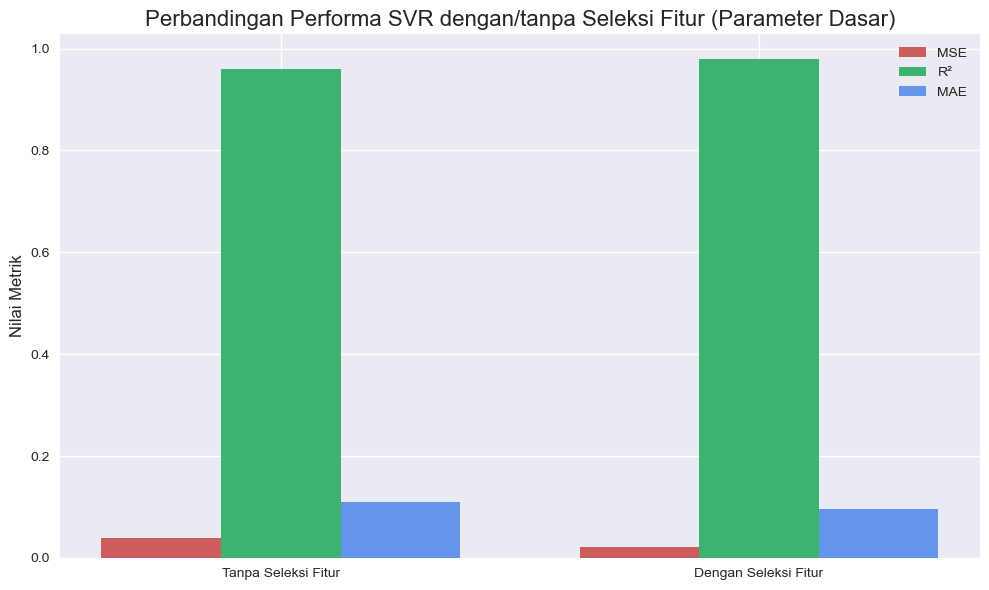


Eksperimen seleksi fitur selesai.


In [9]:
# Visualisasi Perbandingan Performa
labels_fs = ['Tanpa Seleksi Fitur', 'Dengan Seleksi Fitur']
mse_vals_fs = [mse_all_features, mse_selected_features]
r2_vals_fs = [r2_all_features, r2_selected_features]
mae_vals_fs = [mae_all_features, mae_selected_features]

x_fs = np.arange(len(labels_fs))
width_fs = 0.25

fig_fs, ax_fs = plt.subplots(figsize=(10, 6))
rects1_fs = ax_fs.bar(x_fs - width_fs, mse_vals_fs, width_fs, label='MSE', color='indianred')
rects2_fs = ax_fs.bar(x_fs, r2_vals_fs, width_fs, label='R²', color='mediumseagreen')
rects3_fs = ax_fs.bar(x_fs + width_fs, mae_vals_fs, width_fs, label='MAE', color='cornflowerblue')

ax_fs.set_ylabel('Nilai Metrik', fontsize=12)
ax_fs.set_title('Perbandingan Performa SVR dengan/tanpa Seleksi Fitur (Parameter Dasar)', fontsize=16)
ax_fs.set_xticks(x_fs)
ax_fs.set_xticklabels(labels_fs, fontsize=10)
ax_fs.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("\nEksperimen seleksi fitur selesai.")

## Uji Coba Parameter Tunning



--- SKENARIO UJI COBA: MEMBANDINGKAN PARAMETER TUNNING SVR  ---
Data dibagi untuk eksperimen kernel: X_train_kernel (564, 15), X_test_kernel (141, 15)
Menggunakan parameter dasar untuk Linear SVR: C=10.0, Epsilon=0.1

--- Mencoba kernel: **linear** ---
  Melatih Linear SVR dengan C=10.0, Epsilon=0.1
  MSE: 0.0304, R²: 0.9694, MAE: 0.1193

--- Mencoba kernel: **rbf** ---
  Melakukan mini-GridSearchCV untuk RBF SVR...
  Parameter terbaik RBF: {'C': 100, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
  MSE: 0.0146, R²: 0.9853, MAE: 0.0821

--- Mencoba kernel: **poly** ---
  Melakukan mini-GridSearchCV untuk Poly SVR...
  Parameter terbaik Poly: {'C': 10, 'coef0': 1.0, 'degree': 2, 'epsilon': 0.1, 'kernel': 'poly'}
  MSE: 0.0148, R²: 0.9851, MAE: 0.0803

--- Ringkasan Hasil Eksperimen Kernel ---
                  MSE        R²       MAE                                                             Best_Params
Kernel Type                                                                     

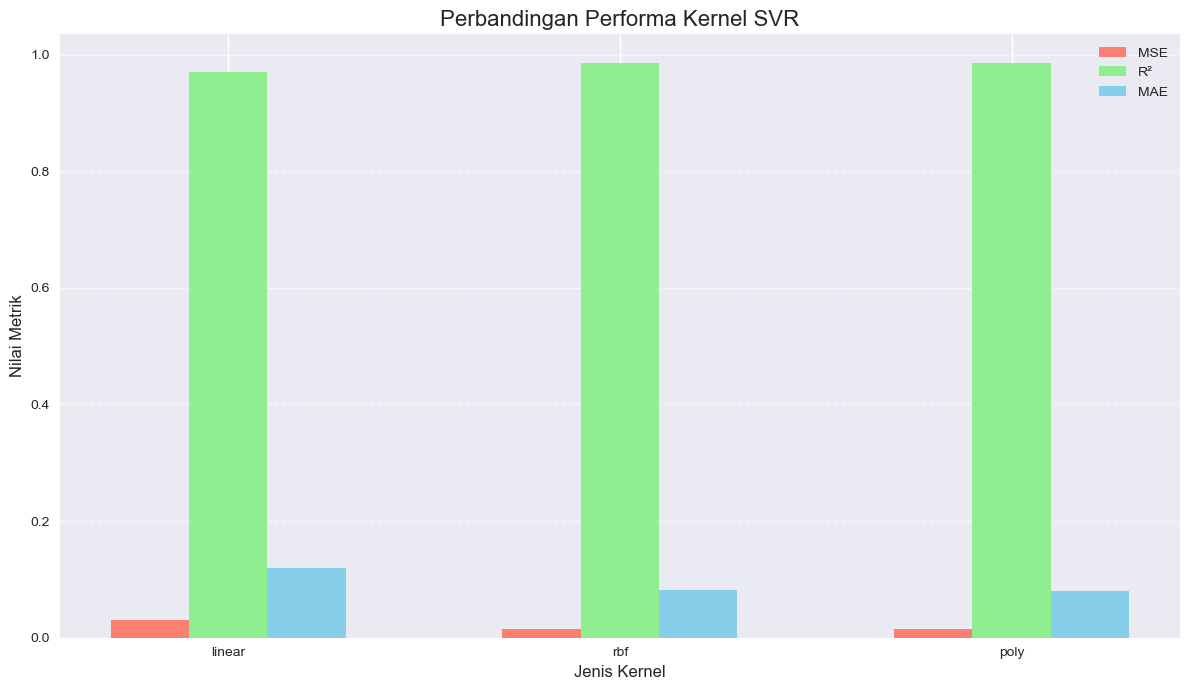


Eksperimen perbandingan kernel SVR selesai.


In [11]:
print("\n\n--- SKENARIO UJI COBA: MEMBANDINGKAN PARAMETER TUNNING SVR  ---")
print("=" * 70)

# Menggunakan data yang sudah diseleksi fiturnya untuk uji coba kernel
X_for_kernel_exp = X_selected_fs 

# --- 1. Bagi data menjadi training dan testing set. ---
X_train_kernel, X_test_kernel, y_train_kernel, y_test_kernel = train_test_split(
    X_for_kernel_exp, y, test_size=0.2, random_state=42
)
print(f"Data dibagi untuk eksperimen kernel: X_train_kernel {X_train_kernel.shape}, X_test_kernel {X_test_kernel.shape}")


# --- 2. Definisikan daftar kernel dan dictionary untuk hasil ---
kernels = ['linear', 'rbf', 'poly']
results_kernel_comparison = {}

BASE_C_LINEAR = 10.0
BASE_EPSILON_LINEAR = 0.1
print(f"Menggunakan parameter dasar untuk Linear SVR: C={BASE_C_LINEAR}, Epsilon={BASE_EPSILON_LINEAR}")

for kernel in kernels:
    print(f"\n--- Mencoba kernel: **{kernel}** ---")
    
    if kernel == 'linear':
        # Untuk linear, gunakan parameter dasar yang fixed
        svr_kernel = SVR(kernel=kernel, C=BASE_C_LINEAR, epsilon=BASE_EPSILON_LINEAR)
        print(f"  Melatih Linear SVR dengan C={BASE_C_LINEAR}, Epsilon={BASE_EPSILON_LINEAR}")
        svr_kernel.fit(X_train_kernel, y_train_kernel)
        best_params_found = {'kernel': kernel, 'C': BASE_C_LINEAR, 'epsilon': BASE_EPSILON_LINEAR}

    elif kernel == 'rbf':
        # Untuk RBF, lakukan mini-GridSearchCV untuk mencari parameter terbaik
        print("  Melakukan mini-GridSearchCV untuk RBF SVR...")
        param_grid_rbf = {
            'kernel': ['rbf'],
            'C': [1, 10, 100],        # Rentang C yang umum untuk RBF
            'epsilon': [0.01, 0.1, 0.5], # Rentang epsilon yang umum
            'gamma': ['scale', 'auto', 0.01, 0.1, 1] # Parameter gamma sangat penting untuk RBF
        }
        grid_search_rbf = GridSearchCV(SVR(), param_grid_rbf, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=0)
        grid_search_rbf.fit(X_train_kernel, y_train_kernel)
        svr_kernel = grid_search_rbf.best_estimator_
        best_params_found = grid_search_rbf.best_params_
        print(f"  Parameter terbaik RBF: {best_params_found}")

    elif kernel == 'poly':
        # Untuk Poly, lakukan mini-GridSearchCV
        print("  Melakukan mini-GridSearchCV untuk Poly SVR...")
        param_grid_poly = {
            'kernel': ['poly'],
            'C': [1, 10, 100],
            'epsilon': [0.01, 0.1, 0.5],
            'degree': [2, 3], # Derajat polinomial
            'coef0': [0.0, 1.0] # Koefisien independen dalam fungsi kernel
        }
        grid_search_poly = GridSearchCV(SVR(), param_grid_poly, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=0)
        grid_search_poly.fit(X_train_kernel, y_train_kernel)
        svr_kernel = grid_search_poly.best_estimator_
        best_params_found = grid_search_poly.best_params_
        print(f"  Parameter terbaik Poly: {best_params_found}")
        
    # Lakukan prediksi dan evaluasi untuk kernel saat ini
    y_pred_kernel = svr_kernel.predict(X_test_kernel)
    mse = mean_squared_error(y_test_kernel, y_pred_kernel)
    r2 = r2_score(y_test_kernel, y_pred_kernel)
    mae = mean_absolute_error(y_test_kernel, y_pred_kernel)

    # Simpan hasil
    results_kernel_comparison[kernel] = {'MSE': mse, 'R²': r2, 'MAE': mae, 'Best_Params': best_params_found}
    print(f"  MSE: {mse:.4f}, R²: {r2:.4f}, MAE: {mae:.4f}")

# --- 4. Ringkasan Hasil Eksperimen Kernel ---
print("\n--- Ringkasan Hasil Eksperimen Kernel ---")
kernel_results_df = pd.DataFrame(results_kernel_comparison).T 
kernel_results_df.index.name = 'Kernel Type'
print(kernel_results_df.to_string())

# Temukan kernel terbaik berdasarkan R²
best_kernel_found_this_test = kernel_results_df['R²'].idxmax()
best_r2_score_kernel_this_test = kernel_results_df['R²'].max()
print(f"\n**Kernel terbaik berdasarkan R² dalam tes ini adalah: '{best_kernel_found_this_test}' dengan R² = {best_r2_score_kernel_this_test:.4f}**")

# --- 5. Visualisasikan perbandingan performa kernel ---
print("\n--- Visualisasi Perbandingan Performa Kernel ---")
kernel_names_plot = list(results_kernel_comparison.keys())
mse_values_plot = [results_kernel_comparison[k]['MSE'] for k in kernel_names_plot]
r2_values_plot = [results_kernel_comparison[k]['R²'] for k in kernel_names_plot]
mae_values_plot = [results_kernel_comparison[k]['MAE'] for k in kernel_names_plot]

x_plot = np.arange(len(kernel_names_plot))
width_plot = 0.2

plt.figure(figsize=(12, 7))
plt.bar(x_plot - width_plot, mse_values_plot, width_plot, label='MSE', color='salmon')
plt.bar(x_plot, r2_values_plot, width_plot, label='R²', color='lightgreen')
plt.bar(x_plot + width_plot, mae_values_plot, width_plot, label='MAE', color='skyblue')

plt.xlabel('Jenis Kernel', fontsize=12)
plt.ylabel('Nilai Metrik', fontsize=12)
plt.title('Perbandingan Performa Kernel SVR', fontsize=16)
plt.xticks(x_plot, kernel_names_plot, fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nEksperimen perbandingan kernel SVR selesai.")

## Final Model And Evaluation

In [13]:
print("\n\n--- FINAL MODEL TRAINING AND EVALUATION ---")
print("=" * 60)

# --- 1. Standardisasi Data Global ---
scaler_final = StandardScaler()
X_scaled_df = pd.DataFrame(scaler_final.fit_transform(X), columns=X.columns)


# --- 2. Menentukan Konfigurasi Terbaik Berdasarkan Hasil Eksperimen ---

# a. Kernel Terbaik: Menggunakan 'rbf' berdasarkan hasil tuning komprehensif Anda
final_best_kernel = 'rbf'
print(f"\nKernel Terbaik yang Dipilih: {final_best_kernel}")

# b. Seleksi Fitur: Karena tuning komprehensif dilakukan pada fitur terseleksi,
#    model final akan menggunakan fitur yang terseleksi.
X_final = X_selected_fs 

print(f"Model akhir akan dilatih dengan {X_final.shape[1]} fitur yang terseleksi.")


# c. Parameter C, Epsilon, dan Gamma Terbaik:
#    MENGGUNAKAN HASIL DARI GRIDSEARCHCV KOMPREHENSIF ANDA UNTUK KERNEL RBF!
final_best_C = 100.0      # Dari hasil GridSearch Anda
final_best_epsilon = 0.1 # Dari hasil GridSearch Anda
final_best_gamma = 0.01  # Dari hasil GridSearch Anda

print(f"\nKonfigurasi Final Model:")
print(f"  Kernel: {final_best_kernel}")
print(f"  C: {final_best_C}")
print(f"  Epsilon: {final_best_epsilon}")
print(f"  Gamma: {final_best_gamma}")
print(f"  Jumlah Fitur Digunakan: {X_final.shape[1]} (Fitur Terseleksi)")


# --- 3. Melatih Model Final ---
final_svr_model = SVR(kernel=final_best_kernel, C=final_best_C, epsilon=final_best_epsilon, gamma=final_best_gamma)


# Bagi X_final dan y ke training dan testing set untuk evaluasi akhir
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y, test_size=0.2, random_state=42 # random_state di sini untuk konsistensi split
)

final_svr_model.fit(X_train_final, y_train_final)


# --- 4. Evaluasi Model Final ---
print("\nEvaluasi Performa Model Final:")
y_pred_final = final_svr_model.predict(X_test_final)

mse_final = mean_squared_error(y_test_final, y_pred_final)
r2_final = r2_score(y_test_final, y_pred_final)
mae_final = mean_absolute_error(y_test_final, y_pred_final)

print(f"  Mean Squared Error (MSE): {mse_final:.4f}")
print(f"  R² Score: {r2_final:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_final:.4f}")

# Optional: Cross-validation untuk evaluasi final yang lebih robust
print("\nCross-Validation pada Model Final (untuk estimasi performa yang lebih robust):")
cv_scores_final_r2 = cross_val_score(final_svr_model, X_final, y, cv=5, scoring='r2', n_jobs=-1)
cv_scores_final_mse = -cross_val_score(final_svr_model, X_final, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

print(f"  R² Cross-Validation Scores: {cv_scores_final_r2}")
print(f"  Mean R² Score (CV): {cv_scores_final_r2.mean():.4f} (Std Dev: {cv_scores_final_r2.std():.4f})")
print(f"  Mean MSE Score (CV): {cv_scores_final_mse.mean():.4f} (Std Dev: {cv_scores_final_mse.std():.4f})")



--- FINAL MODEL TRAINING AND EVALUATION ---

Kernel Terbaik yang Dipilih: rbf
Model akhir akan dilatih dengan 15 fitur yang terseleksi.

Konfigurasi Final Model:
  Kernel: rbf
  C: 100.0
  Epsilon: 0.1
  Gamma: 0.01
  Jumlah Fitur Digunakan: 15 (Fitur Terseleksi)

Evaluasi Performa Model Final:
  Mean Squared Error (MSE): 0.0146
  R² Score: 0.9853
  Mean Absolute Error (MAE): 0.0821

Cross-Validation pada Model Final (untuk estimasi performa yang lebih robust):
  R² Cross-Validation Scores: [0.9109521  0.86273383 0.99095049 0.99011168 0.97103221]
  Mean R² Score (CV): 0.9452 (Std Dev: 0.0505)
  Mean MSE Score (CV): 0.0558 (Std Dev: 0.0516)


## Conclusion
Berdasarkan serangkaian eksperimen dan tuning yang telah dilakukan, model Support Vector Regression (SVR) terbaik untuk memprediksi "Addicted Score" siswa terhadap media sosial telah berhasil dikembangkan. Konfigurasi optimal model ini adalah menggunakan kernel Radial Basis Function (RBF) dengan parameter C=100.0, epsilon=0.1, dan gamma=0.01. Selain itu, model ini menunjukkan performa terbaik ketika dilatih menggunakan 15 fitur terseleksi yang diidentifikasi melalui Random Forest Feature Importance.

Pada data uji (test set), model mencapai R² Score sebesar 0.9853, yang menunjukkan bahwa sekitar 98.53% variabilitas dalam "Addicted Score" dapat dijelaskan oleh fitur-fitur model. Nilai Mean Squared Error (MSE) sebesar 0.0146 dan Mean Absolute Error (MAE) 0.0821 juga mengindikasikan tingkat kesalahan prediksi yang sangat rendah.

Hasil Cross-Validation (CV) 5-fold lebih lanjut mengonfirmasi robustnya model, dengan rata-rata R² Score sebesar 0.9452 (standar deviasi 0.0505) dan rata-rata MSE 0.0558 (standar deviasi 0.0516). Meskipun sedikit lebih rendah dari performa pada test set tunggal (hal yang wajar), ini menunjukkan kemampuan generalisasi model yang kuat pada data yang belum terlihat.

Secara keseluruhan, model SVR yang dikembangkan ini terbukti sangat efektif dan akurat dalam memprediksi tingkat kecanduan media sosial siswa berdasarkan karakteristik perilaku yang tersedia.

##### Limitations
Performa model sangat bergantung pada kualitas dan relevansi fitur-fitur yang tersedia dalam dataset. Jika ada bias dalam pengumpulan data asli (misalnya, data laporan diri yang mungkin tidak selalu akurat), model akan mempelajari bias tersebut.